In [1]:
import numpy as np
import pandas as pd

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.762377,-1.144645,0.462780,-1.582429
2013-01-02,0.475752,0.197225,1.076990,-0.159862
2013-01-03,0.094630,0.055248,0.971397,0.170433
2013-01-04,0.796013,0.026146,-0.412960,1.663700
2013-01-05,2.054178,1.112765,-0.014089,-0.958372
2013-01-06,1.160986,1.422097,1.327726,-1.183548


In [6]:
df2 = pd.DataFrame({'A': 1.,
   ...:                     'B': pd.Timestamp('20130102'),
   ...:                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   ...:                     'D': np.array([3] * 4, dtype='int32'),
   ...:                     'E': pd.Categorical(["test", "train", "test", "train"]),
   ...:                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
#The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [10]:
#Viewing data
df.head(2)

,A,B,C,D
2013-01-01,-1.762377,-1.144645,0.46278,-1.582429
2013-01-02,0.475752,0.197225,1.07699,-0.159862


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.796013,0.026146,-0.412960,1.663700
2013-01-05,2.054178,1.112765,-0.014089,-0.958372
2013-01-06,1.160986,1.422097,1.327726,-1.183548


In [11]:
df.shape

(6, 4)

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.469864,0.278139,0.568641,-0.341680
std,1.282015,0.910965,0.679877,1.178590
min,-1.762377,-1.144645,-0.412960,-1.582429
25%,0.189911,0.033421,0.105128,-1.127254
50%,0.635882,0.126236,0.717089,-0.559117
75%,1.069742,0.883880,1.050592,0.087859
max,2.054178,1.422097,1.327726,1.663700


In [15]:
#transposing data
df.T

In [16]:
df10

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.762377,0.475752,0.094630,0.796013,2.054178,1.160986
B,-1.144645,0.197225,0.055248,0.026146,1.112765,1.422097
C,0.462780,1.076990,0.971397,-0.412960,-0.014089,1.327726
D,-1.582429,-0.159862,0.170433,1.663700,-0.958372,-1.183548


In [17]:
#Sorting by values:
df.sort_values(by='B')

,A,B,C,D
2013-01-01,-1.762377,-1.144645,0.462780,-1.582429
2013-01-04,0.796013,0.026146,-0.412960,1.663700
2013-01-03,0.094630,0.055248,0.971397,0.170433
2013-01-02,0.475752,0.197225,1.076990,-0.159862
2013-01-05,2.054178,1.112765,-0.014089,-0.958372
2013-01-06,1.160986,1.422097,1.327726,-1.183548


In [18]:
#Getting
#Selecting a single column, which yields a Series, equivalent to df.A:
df['A']

2013-01-01   -1.762377
2013-01-02    0.475752
2013-01-03    0.094630
2013-01-04    0.796013
2013-01-05    2.054178
2013-01-06    1.160986
Freq: D, Name: A, dtype: float64

In [19]:
#Stats
df.mean()

A    0.469864
B    0.278139
C    0.568641
D   -0.341680
dtype: float64

In [20]:
#Plotting
import matplotlib.pyplot as plt

In [21]:
ts = pd.Series(np.random.randn(1000),
   .....:                index=pd.date_range('1/1/2000', periods=1000))

In [22]:
ts = ts.cumsum()

<AxesSubplot:>

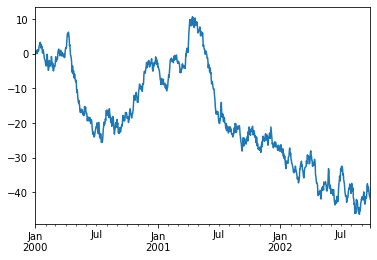

In [23]:
ts.plot()

In [24]:
#Data Frame to Excel
import openpyxl
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [25]:
df4=pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
df4

,Unnamed: 0,A,B,C,D
0,2013-01-01,-1.762377,-1.144645,0.462780,-1.582429
1,2013-01-02,0.475752,0.197225,1.076990,-0.159862
2,2013-01-03,0.094630,0.055248,0.971397,0.170433
3,2013-01-04,0.796013,0.026146,-0.412960,1.663700
4,2013-01-05,2.054178,1.112765,-0.014089,-0.958372
5,2013-01-06,1.160986,1.422097,1.327726,-1.183548


In [26]:
#Boosting your Panda skills
#Query
values_1 = np.random.randint(10, size=10)
values_2 = np.random.randint(10, size=10)
years = np.arange(2010,2020)
groups = ['A','A','B','A','B','B','C','A','C','C']
df5 = pd.DataFrame({'group':groups, 'year':years, 'value_1':values_1, 'value_2':values_2})
df5


,group,year,value_1,value_2
0,A,2010,3,0
1,A,2011,8,8
2,B,2012,0,4
3,A,2013,0,7
4,B,2014,6,1
5,B,2015,9,1
6,C,2016,4,4
7,A,2017,5,5
8,C,2018,4,3
9,C,2019,3,5


In [27]:
df5.query('value_1 < value_2')

,group,year,value_1,value_2
2,B,2012,0,4
3,A,2013,0,7
9,C,2019,3,5


In [28]:
#Insert
#new column
new_col = np.random.randn(10)

In [29]:
#insert the new column at position 2
df5.insert(2, 'new_col', new_col)

In [30]:
df5

,group,year,new_col,value_1,value_2
0,A,2010,1.292476,3,0
1,A,2011,0.676502,8,8
2,B,2012,1.616649,0,4
3,A,2013,-0.826548,0,7
4,B,2014,1.031197,6,1
5,B,2015,-0.056902,9,1
6,C,2016,-1.030021,4,4
7,A,2017,0.448706,5,5
8,C,2018,-0.814835,4,3
9,C,2019,1.640736,3,5


In [31]:
#CUMSUM
df5['cumsum_2'] = df5[['value_2','group']].groupby('group').cumsum()
df5

,group,year,new_col,value_1,value_2,cumsum_2
0,A,2010,1.292476,3,0,0
1,A,2011,0.676502,8,8,8
2,B,2012,1.616649,0,4,4
3,A,2013,-0.826548,0,7,15
4,B,2014,1.031197,6,1,5
5,B,2015,-0.056902,9,1,6
6,C,2016,-1.030021,4,4,4
7,A,2017,0.448706,5,5,20
8,C,2018,-0.814835,4,3,7
9,C,2019,1.640736,3,5,12


In [32]:
#Sample
sample1 = df5.sample(n=3)
sample1

,group,year,new_col,value_1,value_2,cumsum_2
6,C,2016,-1.030021,4,4,4
2,B,2012,1.616649,0,4,4
0,A,2010,1.292476,3,0,0


In [ ]:
#More information:
#https://pandas.pydata.org/pandas-docs/stable/index.html
#https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05